缺失值检查

In [1]:
import numpy as np
import pandas as pd

if __name__ == '__main__':
    df=pd.read_csv('ant-1.3.csv')
    print(df['lcom'].isnull())
    print(df.shape)
    df1=df.dropna()
    print(df1.shape)
    df2=df.fillna(0)
    print(df2)
    df3=df.fillna(method='ffill')

0      False
1      False
2       True
3      False
4      False
       ...  
120    False
121    False
122    False
123     True
124    False
Name: lcom, Length: 125, dtype: bool
(125, 22)
(112, 22)
     wmc  dit  noc  cbo  rfc    lcom  ca  ce  npm     lcom3  ...  moa  \
0     11    4    2   14   42    29.0   2  12    5  0.725000  ...    1   
1     14    1    1    8   32    49.0   4   4   12  0.835165  ...    0   
2      3    2    0    1    9     0.0   0   1    1  0.000000  ...    1   
3     12    3    0   12   37    32.0   0  12   12  0.858586  ...    1   
4      6    3    0    4   21     1.0   0   4    6  0.700000  ...    0   
..   ...  ...  ...  ...  ...     ...  ..  ..  ...       ...  ...  ...   
120   65    3    0   21  155  1670.0   6  21   59  0.917188  ...    5   
121   14    4    0   99   28     0.0  98   1   14  0.384615  ...    1   
122   14    1    0   24   63    63.0  20  20    9  0.841346  ...    0   
123    4    2    0    3   16     0.0   0   3    4  0.333333  ...    0 

异常值处理

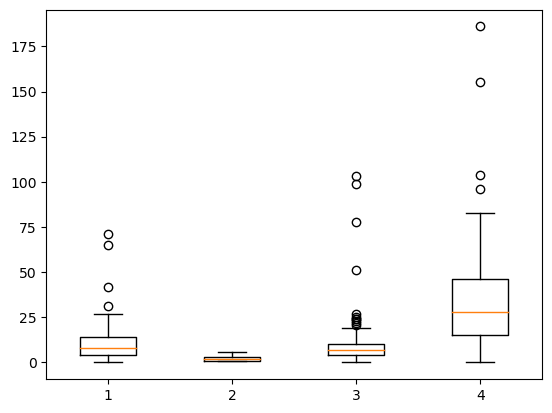

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
if __name__ == '__main__':
    df=pd.read_csv('ant-1.3.csv')
    df1=df[['wmc','dit','cbo','rfc']]
    plt.figure()
    plt.boxplot(df1.values)
    plt.show()

规范化

In [3]:
from sklearn import preprocessing
df1=(df1-df1.min())/(df1.max()-df1.min())
print(df1)
df2=preprocessing.minmax_scale(df)
print(df2)

          wmc  dit       cbo       rfc
0    0.154930  0.6  0.135922  0.225806
1    0.197183  0.0  0.077670  0.172043
2    0.042254  0.2  0.009709  0.048387
3    0.169014  0.4  0.116505  0.198925
4    0.084507  0.4  0.038835  0.112903
..        ...  ...       ...       ...
120  0.915493  0.4  0.203883  0.833333
121  0.197183  0.6  0.961165  0.150538
122  0.197183  0.0  0.233010  0.338710
123  0.056338  0.2  0.029126  0.086022
124  0.380282  0.0  0.029126  0.338710

[125 rows x 4 columns]
[[0.15492958 0.6        0.05882353 ... 0.21682909 0.         0.        ]
 [0.1971831  0.         0.02941176 ... 0.27989982 0.66666667 1.        ]
 [0.04225352 0.2        0.         ... 0.11358525 0.         0.        ]
 ...
 [0.1971831  0.         0.         ... 0.47459793 0.66666667 1.        ]
 [0.05633803 0.2        0.         ... 0.29814638 0.         0.        ]
 [0.38028169 0.         0.         ... 0.2460815  0.         0.        ]]


Z-score规范化

In [4]:
df1=(df1-df1.mean())/df1.std()
print(df1)
df2=preprocessing.scale(df)
print(df2)

          wmc       dit       cbo       rfc
0    0.039365  1.343623  0.239605  0.262982
1    0.328818 -0.999906 -0.163318 -0.081596
2   -0.732507 -0.218729 -0.633395 -0.874126
3    0.135850  0.562447  0.105297  0.090693
4   -0.443055  0.562447 -0.431933 -0.460632
..        ...       ...       ...       ...
120  5.249505  0.562447  0.709682  4.156714
121  0.328818  1.343623  5.947680 -0.219427
122  0.328818 -0.999906  0.911143  0.986596
123 -0.636023 -0.218729 -0.499087 -0.632921
124  1.583111 -0.999906 -0.499087  0.986596

[125 rows x 4 columns]
[[ 0.03952391  1.34902998  0.43978645 ... -0.12446313 -0.38660668
  -0.43643578]
 [ 0.33014091 -1.00392929  0.13094765 ...  0.25155657  2.54223182
   2.29128785]
 [-0.73545476 -0.21960953 -0.17789115 ... -0.7399897  -0.38660668
  -0.43643578]
 ...
 [ 0.33014091 -1.00392929 -0.17789115 ...  1.41232185  2.54223182
   2.29128785]
 [-0.63858243 -0.21960953 -0.17789115 ...  0.36034022 -0.38660668
  -0.43643578]
 [ 1.58948126 -1.00392929 -0.17789115 

连续属性离散化

In [5]:
pd.cut(df.wmc,5,labels=range(5))

0      0
1      0
2      0
3      0
4      0
      ..
120    4
121    0
122    0
123    0
124    1
Name: wmc, Length: 125, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [6]:
pd.qcut(df.wmc,5,labels=range(5))

0      3
1      3
2      0
3      3
4      1
      ..
120    4
121    3
122    3
123    0
124    4
Name: wmc, Length: 125, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

分布分析

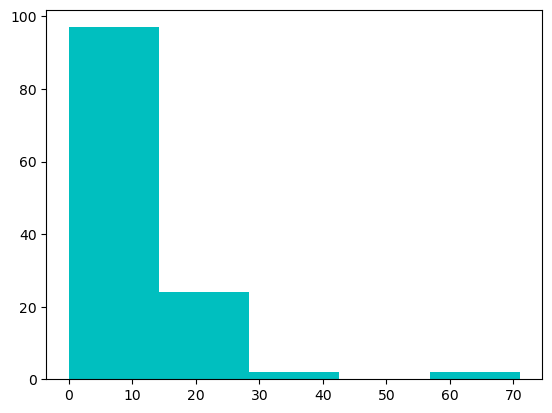

In [7]:
plt.figure()
plt.hist(df.iloc[:,0],5,color='c')
#df1.boxplot()
plt.show()

In [8]:
import scipy
print(scipy.stats.normaltest(df.iloc[:,0]))

NormaltestResult(statistic=111.42891323348456, pvalue=6.360905288037061e-25)


label
0    105
1     20
Name: count, dtype: int64


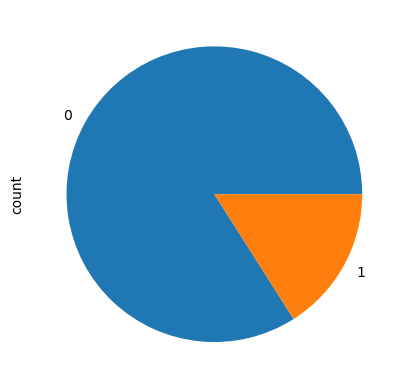

In [9]:
print(df.label.value_counts())
df.label.value_counts().plot(kind='pie')
plt.show()

相关性分析

In [10]:
from scipy.stats import pearsonr
pccs=pearsonr(df.iloc[:,0],df.iloc[:,1])
print(pccs)

PearsonRResult(statistic=0.08648220662388316, pvalue=0.33756637034413334)


统计分析

In [11]:
print(df.iloc[:,0].describe())

count    125.000000
mean      10.592000
std       10.364406
min        0.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       71.000000
Name: wmc, dtype: float64
